In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
df=pd.read_csv("/content/sample_data/report_2018-2019.csv")

In [3]:
df.head()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [4]:
df.drop("Overall rank",axis=1,inplace=True)

In [8]:
df_le = df.copy()

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df_le[column_name] = label_encoder.fit_transform(df[column_name])

In [9]:
for col in list(df_le.columns):
  label_encoding(col)
df_le.head()

,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,1,3,33,7,41,0,85,17
1,0,0,19,29,8,26,10,108,27
2,1,1,93,136,41,196,95,98,18
3,1,0,79,129,37,170,107,80,23
4,2,1,129,151,101,168,11,26,94


Learning Rate: 0.1, Final Loss: 1347.5980


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


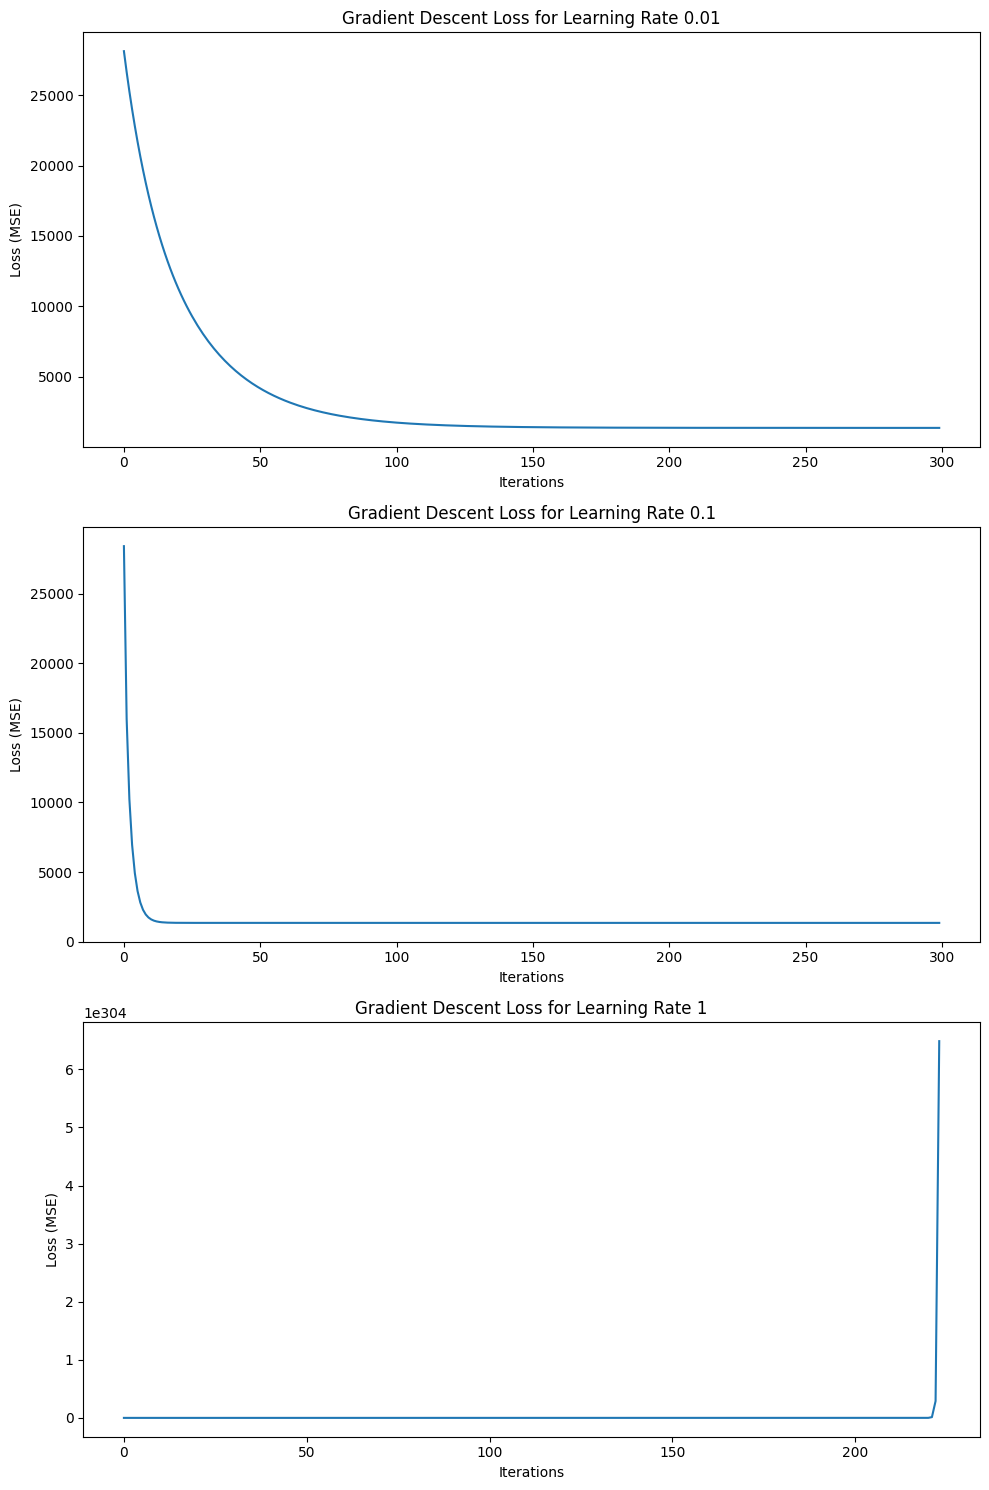

In [19]:
X = df_le.drop("Score",axis=1)
y = df_le["Score"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


learning_rates = [0.01, 0.1, 1]
iterations = 300


losses = {lr: [] for lr in learning_rates}


for lr in learning_rates:
    w = np.random.randn(X_train.shape[1])
    b = np.random.randn()
    for iteration in range(iterations):

        y_pred = np.dot(X_train, w) + b


        error = y_pred - y_train
        loss = np.mean(error**2)


        losses[lr].append(loss)


        dw = 2 * np.dot(X_train.T, error) / X_train.shape[0]
        db = 2 * np.mean(error)


        w -= lr * dw
        b -= lr * db


    if lr == 0.1:
        print(f"Learning Rate: {lr}, Final Loss: {losses[lr][-1]:.4f}")


fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i, lr in enumerate(learning_rates):
    axs[i].plot(losses[lr])
    axs[i].set_title(f'Gradient Descent Loss for Learning Rate {lr}')
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('Loss (MSE)')

plt.tight_layout()
plt.show()


When learning rate is so high,gradient descent misses optimum points.When it is low it is better to find optimum but takes so much time.